
- The os module has a perfect method to list files in a directory.
- Pandas json normalize could work here but is not necessary to convert the JSON data to a dataframe.
- You may need a nested for-loop to access each sale!
- We've put a lot of time into creating the structure of this repository, and it's a good example for future projects.  In the file functions_variables.py, there is an example function that you can import and use.  If you have any variables, functions or classes that you want to make, they can be put in the functions_variables.py file and imported into a notebook.  Note that only .py files can be imported into a notebook. If you want to import everything from a .py file, you can use the following:
```python
from functions_variables import *
```
If you just import functions_variables, then each object from the file will need to be prepended with "functions_variables"\
Using this .py file will keep your notebooks very organized and make it easier to reuse code between notebooks.

In [133]:
# import libraries
import pandas as pd
import numpy as np
import os
import json
from pprint import pprint
from functions_variables import encode_tags
from sklearn.impute import SimpleImputer
import matplotlib.pyplot as plt
import seaborn as sns
import ast
from sklearn.preprocessing import MultiLabelBinarizer

In [134]:
def process_json_files(directory_path, output_csv_path):
    """
    Process JSON files in the specified directory, normalize the data, and save it to a CSV file.

    Parameters:
    - directory_path: str, path to the directory containing JSON files.
    - output_csv_path: str, path to save the output CSV file.

    Returns:
    - None
    """
    # List all JSON files in the specified directory
    files = [f for f in os.listdir(directory_path) if f.endswith('.json')]
    print("Files in directory:")
    print(files)

    # Initialize an empty list to store dataframes
    df_list = []

    # Iterate over each JSON file in the directory
    for file_name in files:
        file_path = os.path.join(directory_path, file_name)
        
        # Open and read the JSON file
        with open(file_path, 'r') as file:
            data = json.load(file)
        
        # First level normalization
        df = pd.json_normalize(data['data']['results'])
        
        # Second level normalization
        if 'branding' in df.columns:
            branding = pd.json_normalize(df['branding'].explode())
            branding.columns = [f'branding.{col}' for col in branding.columns]
            df = df.drop('branding', axis=1).join(branding)

        if 'description' in df.columns:
            description = pd.json_normalize(df['description'])
            description.columns = [f'description.{col}' for col in description.columns]
            df = df.drop('description', axis=1).join(description)

        if 'flags' in df.columns:
            flags = pd.json_normalize(df['flags'])
            flags.columns = [f'flags.{col}' for col in flags.columns]
            df = df.drop('flags', axis=1).join(flags)

        if 'lead_attributes' in df.columns:
            lead_attributes = pd.json_normalize(df['lead_attributes'])
            lead_attributes.columns = [f'lead_attributes.{col}' for col in lead_attributes.columns]
            df = df.drop('lead_attributes', axis=1).join(lead_attributes)

        if 'location.address' in df.columns:
            location_address = pd.json_normalize(df['location.address'])
            location_address.columns = [f'location.address.{col}' for col in location_address.columns]
            df = df.drop('location.address', axis=1).join(location_address)

        if 'location.county' in df.columns:
            location_county = pd.json_normalize(df['location.county'])
            location_county.columns = [f'location.county.{col}' for col in location_county.columns]
            df = df.drop('location.county', axis=1).join(location_county)

        if 'products' in df.columns:
            products = pd.json_normalize(df['products'])
            products.columns = [f'products.{col}' for col in products.columns]
            df = df.drop('products', axis=1).join(products)

        # Third level normalization
        if 'location.address.coordinate' in df.columns:
            location_coordinates = pd.json_normalize(df['location.address.coordinate'])
            location_coordinates.columns = [f'location.address.coordinate.{col}' for col in location_coordinates.columns]
            df = df.drop('location.address.coordinate', axis=1).join(location_coordinates)

        if 'source.agents' in df.columns:
            source_agents = pd.json_normalize(df['source.agents'].explode())
            source_agents.columns = [f'source.agents.{col}' for col in source_agents.columns]
            df = df.drop('source.agents', axis=1).join(source_agents)
            
            # Handle duplicate office_name values
            if 'source.agents.office_name' in df.columns:
                df['source.agents.office_name'] = df['source.agents.office_name'].apply(lambda x: list(set(x)) if isinstance(x, list) else x)

        if 'other_listings.rdc' in df.columns:
            other_listings_rdc = pd.json_normalize(df['other_listings.rdc'].explode())
            other_listings_rdc.columns = [f'other_listings.rdc.{col}' for col in other_listings_rdc.columns]
            df = df.drop('other_listings.rdc', axis=1).join(other_listings_rdc)

        # Ensure all-bool object columns are cast to bool dtype
        for col in df.select_dtypes(include=['object']):
            if df[col].dropna().isin([True, False]).all():
                df[col] = df[col].astype(bool)
        
        # Append the dataframe to the list, skipping 'tags' column normalization
        df_list.append(df)

    # Combine all dataframes
    df = pd.concat(df_list, ignore_index=True)

    # Save the combined DataFrame to a CSV file
    df.to_csv(output_csv_path, index=False)
    print(f"Data saved to {output_csv_path}")

In [135]:
# example usage
directory_path = 'e:/Vocational/Lighthouse Labs/Flex Course/Projects/P02_Midterm_Supervised Learning/data_project_midterm/data'
output_csv_path = 'e:/Vocational/Lighthouse Labs/Flex Course/Projects/P02_Midterm_Supervised Learning/data_project_midterm/data/processed_data.csv'
process_json_files(directory_path, output_csv_path)

Files in directory:
['AK_Juneau_0.json', 'AK_Juneau_1.json', 'AK_Juneau_2.json', 'AK_Juneau_3.json', 'AK_Juneau_4.json', 'AL_Montgomery_0.json', 'AL_Montgomery_1.json', 'AL_Montgomery_2.json', 'AL_Montgomery_3.json', 'AL_Montgomery_4.json', 'AR_LittleRock_0.json', 'AR_LittleRock_1.json', 'AR_LittleRock_2.json', 'AR_LittleRock_3.json', 'AR_LittleRock_4.json', 'AZ_Phoenix_0.json', 'AZ_Phoenix_1.json', 'AZ_Phoenix_2.json', 'AZ_Phoenix_3.json', 'AZ_Phoenix_4.json', 'CA_Sacramento_0.json', 'CA_Sacramento_1.json', 'CA_Sacramento_2.json', 'CA_Sacramento_3.json', 'CA_Sacramento_4.json', 'CO_Denver_0.json', 'CO_Denver_1.json', 'CO_Denver_2.json', 'CO_Denver_3.json', 'CO_Denver_4.json', 'CT_Hartford_0.json', 'CT_Hartford_1.json', 'CT_Hartford_2.json', 'CT_Hartford_3.json', 'CT_Hartford_4.json', 'DE_Dover_0.json', 'DE_Dover_1.json', 'DE_Dover_2.json', 'DE_Dover_3.json', 'DE_Dover_4.json', 'FL_Tallahassee_0.json', 'FL_Tallahassee_1.json', 'FL_Tallahassee_2.json', 'FL_Tallahassee_3.json', 'FL_Talla

At this point, ensure that you have all sales in a dataframe.

In [136]:
df = pd.read_csv(output_csv_path)

In [137]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

- Is each cell one value, or do some cells have lists?

In [138]:
df.head()

,last_update_date,tags,permalink,status,list_date,open_houses,list_price,property_id,photos,community,virtual_tours,listing_id,price_reduced_amount,matterport,primary_photo.href,source.plan_id,source.spec_id,source.type,description.year_built,description.baths_3qtr,description.sold_date,description.sold_price,description.baths_full,description.name,description.baths_half,description.lot_sqft,description.sqft,description.baths,description.sub_type,description.baths_1qtr,description.garage,description.stories,description.beds,description.type,lead_attributes.show_contact_an_agent,flags.is_new_construction,flags.is_for_rent,flags.is_subdivision,flags.is_contingent,flags.is_price_reduced,flags.is_pending,flags.is_foreclosure,flags.is_plan,flags.is_coming_soon,flags.is_new_listing,products.brand_name,location.address.postal_code,location.address.state,location.address.coordinate.lon,location.address.coordinate.lat,location.address.city,location.address.state_code,location.address.line,location.street_view_url,location.county.fips_code,location.county.name,primary_photo,source,other_listings,branding.name,branding.photo,branding.type,source.agents.office_name,other_listings.rdc.listing_id,other_listings.rdc.listing_key,other_listings.rdc.status,other_listings.rdc.primary,community.advertisers,community.description.name
0,2023-09-19T20:52:50Z,"['carport', 'community_outdoor_space', 'cul_de...",9453-Herbert-Pl_Juneau_AK_99801_M90744-30767,sold,2023-06-29T21:16:25.000000Z,False,554950.0,9.074431e+09,"[{'tags': [{'label': 'house_view', 'probabilit...",False,False,2957241843,45000.0,False,https://ap.rdcpix.com/07097d34c98a59ebb7996889...,NaN,NaN,mls,1963.0,False,2023-09-18,False,2.0,False,False,10454.0,1821.0,2.0,NaN,False,1.0,NaN,3.0,single_family,True,False,False,False,False,False,False,False,False,False,False,basic_opt_in,99801.0,Alaska,-134.59372,58.36395,Juneau,AK,9453 Herbert Pl,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,EXP Realty LLC - Southeast Alaska,False,Office,EXP Realty LLC - Southeast Alaska,2.957242e+09,NaN,sold,True,NaN,NaN
1,NaN,NaN,8477-Thunder-Mountain-Rd_Juneau_AK_99801_M9424...,sold,NaN,False,NaN,9.424984e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-22,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,8477 Thunder Mountain Rd,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,Non-Member Office,2.957023e+09,NaN,off_market,False,NaN,NaN
2,NaN,NaN,4515-Glacier-Hwy_Juneau_AK_99801_M94790-68516,sold,NaN,False,NaN,9.479069e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-22,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,4515 Glacier Hwy,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,NaN,2.958935e+09,NaN,sold,False,NaN,NaN
3,NaN,NaN,17850-Point-Stephens-Rd_Juneau_AK_99801_M98793...,sold,NaN,False,NaN,9.879332e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-21,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,17850 Point Stephens Rd,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,NaN,2.958935e+09,NaN,sold,False,NaN,NaN
4,NaN,NaN,9951-Stephen-Richards-Memorial-Dr_Juneau_AK_99...,sold,NaN,False,NaN,9.521640e+09,NaN,False,False,NaN,NaN,False,NaN,NaN,NaN,NaN,NaN,False,2023-08-21,False,NaN,False,False,NaN,NaN,NaN,NaN,False,NaN,NaN,NaN,NaN,True,False,False,False,False,False,False,False,False,False,False,NaN,99801.0,Alaska,NaN,NaN,Juneau,AK,9951 Stephen Richards Memorial Dr,https://maps.googleapis.com/maps/api/streetvie...,False,Juneau,NaN,NaN,NaN,NaN,False,Office,NaN,2.958925e+

- What are the data types of each column?

In [139]:
# display all columns and their data types
print("Columns and their data types:")
print(df.dtypes)

Columns and their data types:
last_update_date                          object
tags                                      object
permalink                                 object
status                                    object
list_date                                 object
open_houses                               object
list_price                                object
property_id                              float64
photos                                    object
community                                 object
virtual_tours                             object
listing_id                                object
price_reduced_amount                      object
matterport                                object
primary_photo.href                        object
source.plan_id                            object
source.spec_id                            object
source.type                               object
description.year_built                    object
description.baths_3qtr                 

- Some sales may not actually include the sale price. These rows should be dropped.

In [140]:
# number of rows before dropping
rows_before = len(df)

# drop rows without 'description.sold_price' (target variable)
df = df.dropna(subset=['description.sold_price'])

# number of rows after dropping
rows_after = len(df)

# calculate the number of rows dropped
rows_dropped = rows_before - rows_after

# print the number of rows dropped
print(f"Number of rows dropped: {rows_dropped}")

Number of rows dropped: 37


- There are a lot of None values.  Should these be dropped or replaced with something?

In [141]:
# check the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100
print("Percentage of missing values in each column:")
print(missing_percentage)

Percentage of missing values in each column:
last_update_date                          0.416973
tags                                      6.217807
permalink                                 0.000000
status                                    0.000000
list_date                                 4.881040
open_houses                               0.000000
list_price                                5.261221
property_id                               0.000000
photos                                    8.891342
community                                 2.575423
virtual_tours                            74.540103
listing_id                                4.881040
price_reduced_amount                     68.297768
matterport                                0.000000
primary_photo.href                        9.271523
source.plan_id                           17.525141
source.spec_id                           17.525141
source.type                               4.991415
description.year_built               

In [142]:
# calculate the percentage of missing values in each column
missing_percentage = df.isnull().mean() * 100

# define a threshold for dropping columns (e.g., rule of thumb: more than 50% missing values)
threshold = 50

# identify columns to drop based on the threshold
columns_to_drop = missing_percentage[missing_percentage > threshold].index

# drop the identified columns from the DataFrame
df = df.drop(columns=columns_to_drop)

# print the dropped columns
print(f"Dropped columns: {columns_to_drop}")

# display the remaining columns
print("Remaining columns after dropping:")
print(df.columns)

Dropped columns: Index(['virtual_tours', 'price_reduced_amount', 'description.baths_half',
       'description.sub_type', 'primary_photo', 'source', 'other_listings',
       'branding.photo', 'source.agents.office_name', 'community.advertisers',
       'community.description.name'],
      dtype='object')
Remaining columns after dropping:
Index(['last_update_date', 'tags', 'permalink', 'status', 'list_date',
       'open_houses', 'list_price', 'property_id', 'photos', 'community',
       'listing_id', 'matterport', 'primary_photo.href', 'source.plan_id',
       'source.spec_id', 'source.type', 'description.year_built',
       'description.baths_3qtr', 'description.sold_date',
       'description.sold_price', 'description.baths_full', 'description.name',
       'description.lot_sqft', 'description.sqft', 'description.baths',
       'description.baths_1qtr', 'description.garage', 'description.stories',
       'description.beds', 'description.type',
       'lead_attributes.show_contact_an_

In [143]:
# list of irrelevant columns to drop
columns_to_drop = ['last_update_date', 'permalink', 'status', 'open_houses', 'list_price', 'property_id', 'photos', 'community', 
                   'listing_id', 'matterport', 'primary_photo.href', 'source.plan_id', 'source.spec_id', 'source.type', 
                   'location.street_view_url', 'matterport', 'description.name', 'description.baths_1qtr', 
                   'lead_attributes.show_contact_an_agent', 'flags.is_new_construction', 'flags.is_for_rent', 'flags.is_subdivision', 
                   'flags.is_contingent', 'flags.is_pending', 'flags.is_plan', 'flags.is_coming_soon', 'flags.is_new_listing', 
                   'products.brand_name', 'location.address.postal_code', 'location.address.coordinate.lon', 'location.address.coordinate.lat', 
                   'location.address.state_code', 'location.address.line', 'location.street_view_url', 'location.county.fips_code', 'branding.type', 
                   'other_listings.rdc.listing_id', 'other_listings.rdc.listing_key', 'other_listings.rdc.status', 'other_listings.rdc.primary']

# drop the specified columns
df = df.drop(columns=columns_to_drop)

In [144]:
# Convert date columns to datetime
df['list_date'] = pd.to_datetime(df['list_date'], errors='coerce').dt.tz_localize(None)
df['description.sold_date'] = pd.to_datetime(df['description.sold_date'], errors='coerce').dt.tz_localize(None)

# Convert year built to integer
df['description.year_built'] = pd.to_numeric(df['description.year_built'], errors='coerce').astype('Int64')

# Convert baths_3qtr, baths_full, and other bath-related columns to numeric
df['description.baths_3qtr'] = pd.to_numeric(df['description.baths_3qtr'], errors='coerce').astype('Int64')
df['description.baths_full'] = pd.to_numeric(df['description.baths_full'], errors='coerce').astype('Int64')
df['description.baths'] = pd.to_numeric(df['description.baths'], errors='coerce').astype('float')
df['description.garage'] = pd.to_numeric(df['description.garage'], errors='coerce').astype('Int64')

# Convert sold_price, lot_sqft, and sqft to numeric
df['description.sold_price'] = pd.to_numeric(df['description.sold_price'], errors='coerce').astype('float')
df['description.lot_sqft'] = pd.to_numeric(df['description.lot_sqft'], errors='coerce').astype('Int64')
df['description.sqft'] = pd.to_numeric(df['description.sqft'], errors='coerce').astype('Int64')

# Convert stories and beds to integer
df['description.stories'] = pd.to_numeric(df['description.stories'], errors='coerce').astype('Int64')
df['description.beds'] = pd.to_numeric(df['description.beds'], errors='coerce').astype('Int64')

# Convert type to string
df['description.type'] = df['description.type'].astype(str)

# Convert flags to boolean
df['flags.is_price_reduced'] = df['flags.is_price_reduced'].astype(bool)
df['flags.is_foreclosure'] = df['flags.is_foreclosure'].astype(bool)

# Convert location and branding columns to string
df['location.address.state'] = df['location.address.state'].astype(str)
df['location.address.city'] = df['location.address.city'].astype(str)
df['location.county.name'] = df['location.county.name'].astype(str)
df['branding.name'] = df['branding.name'].astype(str)

# Display the DataFrame with updated types
print(df.dtypes)

tags                              object
list_date                 datetime64[ns]
description.year_built             Int64
description.baths_3qtr             Int64
description.sold_date     datetime64[ns]
description.sold_price           float64
description.baths_full             Int64
description.lot_sqft               Int64
description.sqft                   Int64
description.baths                float64
description.garage                 Int64
description.stories                Int64
description.beds                   Int64
description.type                  object
flags.is_price_reduced              bool
flags.is_foreclosure                bool
location.address.state            object
location.address.city             object
location.county.name              object
branding.name                     object
dtype: object


In [145]:
# function to cap outliers at a specified percentile
def cap_outliers(df, cols, lower_percentile=0.05, upper_percentile=0.95):
    for col in cols:
        lower_bound = df[col].quantile(lower_percentile)
        upper_bound = df[col].quantile(upper_percentile)
        df[col] = df[col].clip(lower=lower_bound, upper=upper_bound)
    return df

# identify all numerical columns to cap outliers
numerical_cols_to_cap = df.select_dtypes(include=['number']).columns

# cap outliers in these numerical columns
df = cap_outliers(df, numerical_cols_to_cap)

- Some sales don't include the property type.

In [146]:
# Select categorical columns (excluding 'tags') and boolean columns
categorical_cols = df.select_dtypes(include=['object', 'bool']).columns
categorical_cols = categorical_cols.drop('tags', errors='ignore')  # Drop 'tags' if it exists in the selection

# Impute missing values for categorical columns using the most frequent strategy
imputer = SimpleImputer(strategy='most_frequent')
df[categorical_cols] = imputer.fit_transform(df[categorical_cols])

# Display the DataFrame to verify the imputation
print(df[categorical_cols].isnull().sum())

description.type          0
flags.is_price_reduced    0
flags.is_foreclosure      0
location.address.state    0
location.address.city     0
location.county.name      0
branding.name             0
dtype: int64


In [147]:
# Select columns with numeric values of datatype 'Int64' and 'float64'
numerical_cols = df.select_dtypes(include=['Int64', 'float64']).columns

# Impute missing values for numerical columns using the median strategy
imputer = SimpleImputer(strategy='median')
df[numerical_cols] = imputer.fit_transform(df[numerical_cols])

# Verify the imputation
print(df[numerical_cols].isnull().sum())

description.year_built    0
description.baths_3qtr    0
description.sold_price    0
description.baths_full    0
description.lot_sqft      0
description.sqft          0
description.baths         0
description.garage        0
description.stories       0
description.beds          0
dtype: int64


In [148]:
# Impute missing values for datetime columns
# Calculate the midpoint date for rows with missing values
def calculate_midpoint_date(row):
    dates = pd.to_datetime([row['description.sold_date'], row['list_date']])
    return dates.mean()

df['midpoint_date'] = df.apply(calculate_midpoint_date, axis=1)

# Fill missing values with the midpoint date
df['description.sold_date'].fillna(df['midpoint_date'], inplace=True)
df['list_date'].fillna(df['midpoint_date'], inplace=True)

# Drop the midpoint_date column as it is no longer needed
df.drop(columns=['midpoint_date'], inplace=True)

# Verify the imputation
print(df[['list_date', 'description.sold_date']].isnull().sum())

list_date                0
description.sold_date    0
dtype: int64


In [149]:
# Feature engineer new column called 'days_on_market'

# Calculate the days on market
df['days_on_market'] = (df['description.sold_date'] - df['list_date']).dt.days

# Drop the original date columns and the midpoint_date column as they are no longer needed
df.drop(columns=['description.sold_date', 'list_date'], inplace=True)

Consider the fact that with tags, there are a lot of categorical variables.
- Maybe the "tags" will help create some features.
- Perhaps we can get rid of tags that have a low frequency.

In [151]:
# Function to convert string representation of list to actual list
def convert_to_list(x):
    try:
        if isinstance(x, str):
            return ast.literal_eval(x)
        elif isinstance(x, list):
            return x
        elif isinstance(x, bool):
            return []
        else:
            return []
    except (ValueError, SyntaxError):
        return []

# Convert string to list and handle NaN and non-list values
df['tags'] = df['tags'].apply(lambda x: convert_to_list(x) if isinstance(x, (str, list, bool)) else [])

# Initialize MultiLabelBinarizer
mlb = MultiLabelBinarizer()

# Perform one-hot encoding
one_hot_encoded = mlb.fit_transform(df['tags'])

# Create a DataFrame with the one-hot encoded tags
one_hot_encoded_df = pd.DataFrame(one_hot_encoded, columns=mlb.classes_)

# Concatenate the new DataFrame with the original DataFrame
df = pd.concat([df, one_hot_encoded_df], axis=1)

# Drop the original 'tags' column if no longer needed
df.drop('tags', axis=1, inplace=True)

# Display the updated DataFrame
df.columns

Index(['description.year_built', 'description.baths_3qtr',
       'description.sold_price', 'description.baths_full',
       'description.lot_sqft', 'description.sqft', 'description.baths',
       'description.garage', 'description.stories', 'description.beds',
       ...
       'views', 'volleyball', 'washer_dryer', 'water_view', 'waterfront',
       'well_water', 'white_kitchen', 'wine_cellar', 'wooded_land',
       'wrap_around_porch'],
      dtype='object', length=173)

- How many columns would we have if we OHE tags, city and state?

In [152]:
# Handle NaN values explicitly
df['description.type'] = df['description.type'].replace('nan', np.nan).fillna('unknown')
df['location.address.city'] = df['location.address.city'].fillna('unknown')
df['location.address.state'] = df['location.address.state'].fillna('unknown')
df['location.county.name'] = df['location.county.name'].fillna('unknown')
df['branding.name'] = df['branding.name'].fillna('unknown')
df['flags.is_price_reduced'] = df['flags.is_price_reduced'].fillna(False)
df['flags.is_foreclosure'] = df['flags.is_foreclosure'].fillna(False)

# One-hot encode the specified columns
columns_to_encode = [
    'description.type', 'location.address.city', 'location.address.state', 
    'location.county.name', 'branding.name', 
    'flags.is_price_reduced', 'flags.is_foreclosure'
]

# One-hot encoding for the specified columns
df = pd.get_dummies(df, columns=columns_to_encode, prefix=columns_to_encode)

In [153]:
# Initialize the SimpleImputer for numerical columns
num_imputer = SimpleImputer(strategy='mean')

# Apply the numerical imputer to numerical columns
df_imputed = num_imputer.fit_transform(df)

# Convert back to DataFrame with original column names
df = pd.DataFrame(df_imputed, columns=df.columns)

In [154]:
# Save the combined DataFrame to a CSV file
df.to_csv(output_csv_path, index=False)
print(f"Data saved to {output_csv_path}")

Data saved to e:/Vocational/Lighthouse Labs/Flex Course/Projects/P02_Midterm_Supervised Learning/data_project_midterm/data/processed_data.csv


- Sales will vary drastically between cities and states.  Is there a way to keep information about which city it is without OHE such as using central tendency?
- Could we label encode or ordinal encode?  Yes, but this may have undesirable effects, giving nominal data ordinal values.
- If you replace cities or states with numerical values, make sure that the data is split so that we don't leak data into the training selection. This is a great time to train test split. Compute on the training data, and join these values to the test data
- Drop columns that aren't needed.
- Don't keep the list price because it will be too close to the sale price.

**STRETCH**

- You're not limited to just using the data provided to you. Think/ do some research about other features that might be useful to predict housing prices. 
- Can you import and join this data? Make sure you do any necessary preprocessing and make sure it is joined correctly.
- Example suggestion: could mortgage interest rates in the year of the listing affect the price? 

In [ ]:
# import, join and preprocess new data here

Remember all of the EDA that you've been learning about?  Now is a perfect time for it!
- Look at distributions of numerical variables to see the shape of the data and detect outliers.
- Scatterplots of a numerical variable and the target go a long way to show correlations.
- A heatmap will help detect highly correlated features, and we don't want these.
- Is there any overlap in any of the features? (redundant information, like number of this or that room...)

In [64]:
# Load Data
df = pd.read_csv(output_csv_path)

## Summary Statistics

In [65]:
# Summary Statistics
def summary_statistics(df, columns):
    print("Summary Statistics:")
    print(df[columns].describe())
    print("\nData Types:")
    print(df[columns].dtypes)
    print("\nMissing Values:")
    print(df[columns].isnull().sum())

# List of specific columns to include in the summary statistics
columns = [
    'description.year_built', 'description.baths_3qtr', 'description.sold_price',
    'description.baths_full', 'description.lot_sqft', 'description.sqft',
    'description.baths', 'description.garage', 'description.stories',
    'description.beds', 'days_on_market'
]

# Call the function with the dataframe and specified columns
summary_statistics(df, columns)

Summary Statistics:
       description.year_built  description.baths_3qtr  description.sold_price  \
count             8186.000000             8186.000000            8.186000e+03   
mean              1969.921388                1.016188            3.552224e+05   
std                 31.577620                0.125960            2.193764e+05   
min               1900.000000                1.000000            5.416700e+04   
25%               1952.000000                1.000000            2.200000e+05   
50%               1975.000000                1.000000            3.140000e+05   
75%               1994.000000                1.000000            4.279000e+05   
max               2017.000000                2.000000            1.002500e+06   

       description.baths_full  description.lot_sqft  description.sqft  \
count             8186.000000           8186.000000       8186.000000   
mean                 1.842531          13035.860559       1829.203581   
std                  0.649591  

### Summary Statistics Interpretation

#### 1. **Year Built (`description.year_built`)**
- **Count:** 8154 properties
- **Mean:** 1970, indicating that on average, the properties were built around the year 1970.
- **Standard Deviation:** 31.15 years, showing a considerable spread in the construction years.
- **Min/Max:** The oldest property was built in 1904, and the newest in 2016.
- **Quartiles:** 25% of properties were built before 1952, 50% before 1975, and 75% before 1994.

#### 2. **Three-Quarter Bathrooms (`description.baths_3qtr`)**
- **Count:** 8154 properties
- **Mean/Median/Standard Deviation:** All values are 1.0 with no variation, indicating each property has exactly one three-quarter bathroom.

#### 3. **Sold Price (`description.sold_price`)**
- **Count:** 8154 properties
- **Mean:** \$349,714, suggesting the average sold price of the properties is around \$350,000.
- **Standard Deviation:** \$203,112, indicating significant variability in the sold prices.
- **Min/Max:** The lowest sold price is \$62,000, while the highest is \$875,000.
- **Quartiles:** 25% of properties sold for less than \$220,000, 50% for less than \$314,000, and 75% for less than \$428,750.

#### 4. **Full Bathrooms (`description.baths_full`)**
- **Count:** 8154 properties
- **Mean:** 1.84, indicating most properties have between 1 and 2 full bathrooms.
- **Standard Deviation:** 0.65, showing some variation in the number of full bathrooms.
- **Min/Max:** Properties have between 1 and 3 full bathrooms.
- **Quartiles:** 25% and 50% of properties have 1 full bathroom, while 75% have 2 full bathrooms.

#### 5. **Lot Size (`description.lot_sqft`)**
- **Count:** 8154 properties
- **Mean:** 12,541 square feet.
- **Standard Deviation:** 14,413 square feet, indicating wide variability in lot sizes.
- **Min/Max:** The smallest lot is 1,442 square feet, and the largest is 61,855 square feet.
- **Quartiles:** 25% of properties have lots smaller than 5,663 square feet, 50% smaller than 7,841 square feet, and 75% smaller than 11,326 square feet.

#### 6. **Square Footage (`description.sqft`)**
- **Count:** 8154 properties
- **Mean:** 1,826 square feet.
- **Standard Deviation:** 759.60 square feet, showing variability in property sizes.
- **Min/Max:** The smallest property is 840 square feet, and the largest is 3,771.5 square feet.
- **Quartiles:** 25% of properties are smaller than 1,299.25 square feet, 50% smaller than 1,635 square feet, and 75% smaller than 2,160 square feet.

#### 7. **Total Bathrooms (`description.baths`)**
- **Count:** 8154 properties
- **Mean:** 2.08 bathrooms.
- **Standard Deviation:** 1.03, indicating some variability in the total number of bathrooms.
- **Min/Max:** Properties have between 0 and 4 bathrooms.
- **Quartiles:** 25% of properties have 1 bathroom, 50% have 2 bathrooms, and 75% have 3 bathrooms.

#### 8. **Garage Spaces (`description.garage`)**
- **Count:** 8154 properties
- **Mean:** 1.93 garage spaces.
- **Standard Deviation:** 0.45, indicating low variability.
- **Min/Max:** Properties have between 1 and 3 garage spaces.
- **Quartiles:** 50% of properties have 2 garage spaces, with little variation.

#### 9. **Stories (`description.stories`)**
- **Count:** 8154 properties
- **Mean:** 1.42 stories.
- **Standard Deviation:** 0.60, indicating variability in the number of stories.
- **Min/Max:** Properties have between 1 and 3 stories.
- **Quartiles:** 25% and 50% of properties have 1 story, while 75% have 2 stories.

#### 10. **Bedrooms (`description.beds`)**
- **Count:** 8154 properties
- **Mean:** 3.16 bedrooms.
- **Standard Deviation:** 0.84, indicating moderate variability in the number of bedrooms.
- **Min/Max:** Properties have between 2 and 5 bedrooms.
- **Quartiles:** 50% of properties have 3 bedrooms, with most properties having between 3 and 4 bedrooms.

#### 11. **Days on Market (`days_on_market`)**
- **Count:** 8154 properties
- **Mean:** 185 days.
- **Standard Deviation:** 476.95 days, indicating high variability.
- **Min/Max:** Properties are on the market for between 11 and 2236 days.
- **Quartiles:** 25% of properties are on the market for less than 39 days, 50% for less than 63 days, and 75% for less than 103 days.

## Plot Distributions

In [66]:
# Function to plot distribution of a specified column
def plot_distribution(df, column):
    if column in df.columns:
        plt.figure(figsize=(10, 6))
        sns.histplot(df[column], kde=True)
        plt.title(f'Distribution of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
        plt.show()
    else:
        print(f"Column {column} not found in DataFrame")

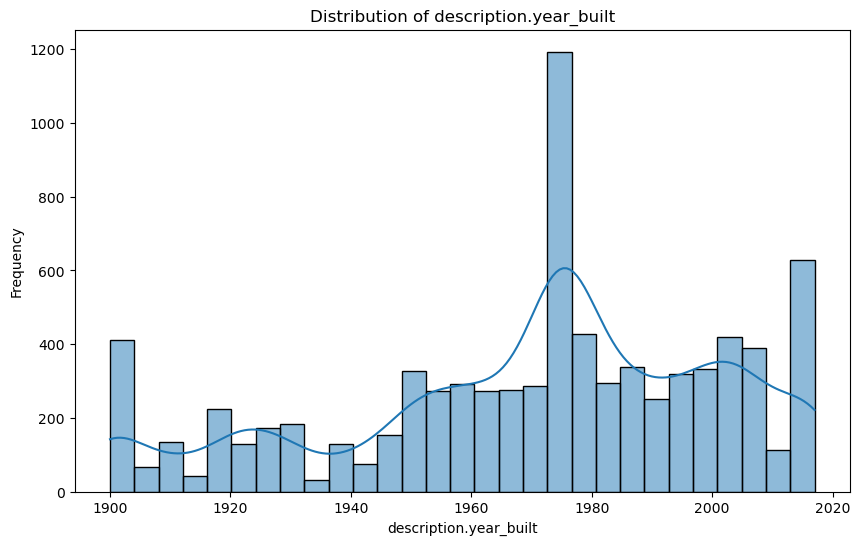

In [67]:
plot_distribution(df, 'description.year_built')

### Interpretation of the Distribution of `description.year_built`

The histogram displays the frequency distribution of the year properties were built (`description.year_built`). The x-axis represents the year properties were built, ranging from 1900 to 2020, and the y-axis represents the frequency, or the number of properties built in each year bin. The blue bars indicate the count of properties built in each time period, and the blue line represents the Kernel Density Estimate (KDE) showing the smoothed distribution of the data.

#### Key Observations:

1. **High Variability in Construction Years:**
   - There is considerable variability in the years properties were built, with notable peaks and troughs over time.

2. **Peak Around 1980:**
   - The highest peak occurs around 1980, indicating a significant surge in the number of properties built during this period. This could be due to various factors such as economic conditions, housing policies, or demographic changes at that time.

3. **Early 1900s Construction:**
   - There is a smaller peak around the early 1900s, showing that a substantial number of properties were built around that time.

4. **Post-1980s Construction:**
   - After the peak in 1980, there is a noticeable decline, followed by smaller, steady increases in property construction in the 1990s and early 2000s.

5. **Recent Construction:**
   - There is another increase in properties built closer to 2016, indicating a more recent uptick in construction activities.

6. **KDE Line:**
   - The KDE line provides a smoothed representation of the data, highlighting the overall trend without the noise of individual bin counts. It supports the observations of peaks around the early 1900s, 1980, and a slight increase towards 2016.

### Conclusion:
The histogram indicates periods of significant property construction activity, especially around 1980 and the early 1900s, with a more recent increase towards 2016. This distribution could provide insights into housing market trends, urban development phases, and historical economic conditions influencing property construction over the last century.

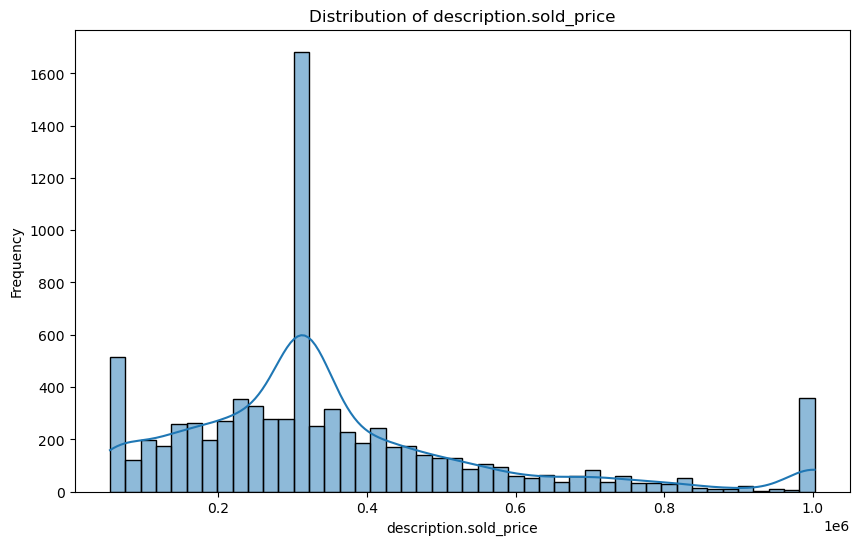

In [68]:
plot_distribution(df, 'description.sold_price')

### Interpretation of the Distribution of `description.sold_price`

The histogram displays the frequency distribution of the sold prices of properties (`description.sold_price`). The x-axis represents the sold price of the properties, ranging from $0 to $900,000, and the y-axis represents the frequency, or the number of properties sold within each price bin. The blue bars indicate the count of properties sold at different price points, and the blue line represents the Kernel Density Estimate (KDE) showing the smoothed distribution of the data.

#### Key Observations:

1. **High Variability in Sold Prices:**
   - There is considerable variability in the sold prices, with a noticeable concentration of properties sold within certain price ranges.

2. **Major Peak Around $300,000:**
   - The highest peak occurs around $300,000, indicating a significant number of properties were sold at this price point. This could suggest that $300,000 is a common price for properties in the dataset.

3. **Secondary Peaks:**
   - There are smaller peaks around $100,000 and $800,000, indicating additional clusters of properties sold at these price points.

4. **Low to Mid-Range Prices:**
   - A substantial number of properties are sold in the lower price ranges, between $100,000 and $300,000. This suggests that a significant portion of the properties are more affordable.

5. **Higher-End Prices:**
   - Fewer properties are sold at higher prices, above $500,000. The frequency decreases as the price increases, with a slight increase again near $800,000.

6. **KDE Line:**
   - The KDE line provides a smoothed representation of the data, highlighting the overall trend without the noise of individual bin counts. It supports the observations of peaks around $300,000, $100,000, and $800,000, showing the distribution's shape and spread.

### Conclusion:
The histogram indicates that most properties are sold at around $300,000, with significant numbers also sold at lower prices, around $100,000, and fewer at higher prices, with another peak near $800,000. This distribution can provide insights into the pricing trends within the dataset and can help in understanding the market's affordability and distribution of property values.

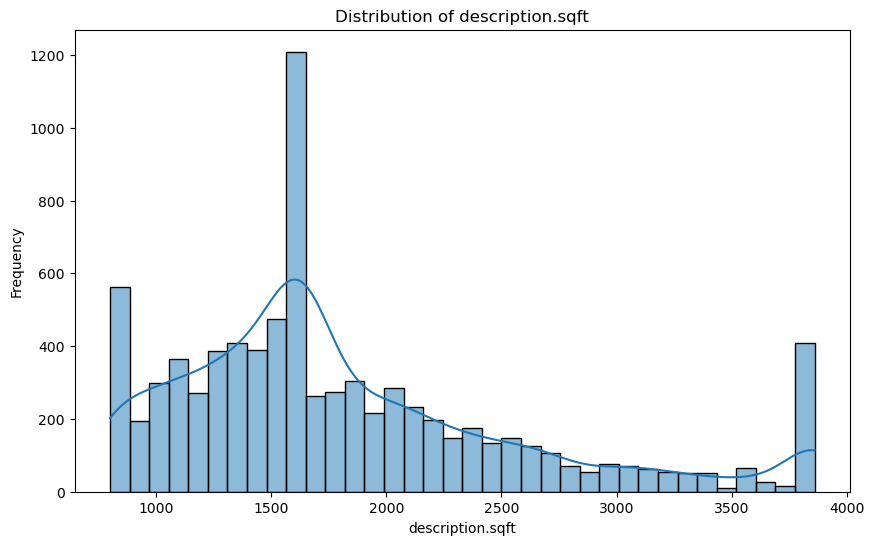

In [69]:
plot_distribution(df, 'description.sqft')

### Interpretation of the Distribution of `description.sqft`

The histogram displays the frequency distribution of the square footage of properties (`description.sqft`). The x-axis represents the square footage of the properties, ranging from 0 to 3,500 square feet, and the y-axis represents the frequency, or the number of properties within each square footage bin. The blue bars indicate the count of properties in each square footage range, and the blue line represents the Kernel Density Estimate (KDE) showing the smoothed distribution of the data.

#### Key Observations:

1. **High Variability in Square Footage:**
   - There is significant variability in the square footage of the properties, with different peaks indicating common property sizes.

2. **Major Peak Around 1,500 Square Feet:**
   - The highest peak occurs around 1,500 square feet, indicating a large number of properties are of this size. This suggests that 1,500 square feet is a common property size in the dataset.

3. **Secondary Peaks:**
   - There are smaller peaks around 1,000 and 3,500 square feet. These indicate additional clusters of properties at these sizes.

4. **Low to Mid-Range Sizes:**
   - A substantial number of properties have sizes between 1,000 and 2,000 square feet. This suggests that most properties in the dataset are within this range.

5. **Higher-End Sizes:**
   - Fewer properties are larger than 2,500 square feet. The frequency decreases as the square footage increases, indicating fewer large properties.

6. **KDE Line:**
   - The KDE line provides a smoothed representation of the data, highlighting the overall trend without the noise of individual bin counts. It supports the observations of peaks around 1,000, 1,500, and 3,500 square feet, showing the distribution's shape and spread.

### Conclusion:
The histogram indicates that most properties have square footage around 1,500 square feet, with significant numbers also at around 1,000 and 3,500 square feet. The distribution suggests that medium-sized properties (1,000 to 2,000 square feet) are most common, with fewer larger properties. This distribution can provide insights into the typical property sizes within the dataset and help understand market trends related to property sizes.

## Scatterplots

In [71]:
# Function to plot scatterplot for a specified feature against the target
def plot_scatterplot(df, feature):
    if feature in df.columns:
        plt.figure(figsize=(10, 6))
        sns.scatterplot(x=df[feature], y=df['description.sold_price'])
        plt.title(f'{feature} vs Sold Price')
        plt.xlabel(feature)
        plt.ylabel('Sold Price')
        plt.show()
    else:
        print(f"Feature {feature} not found in DataFrame")

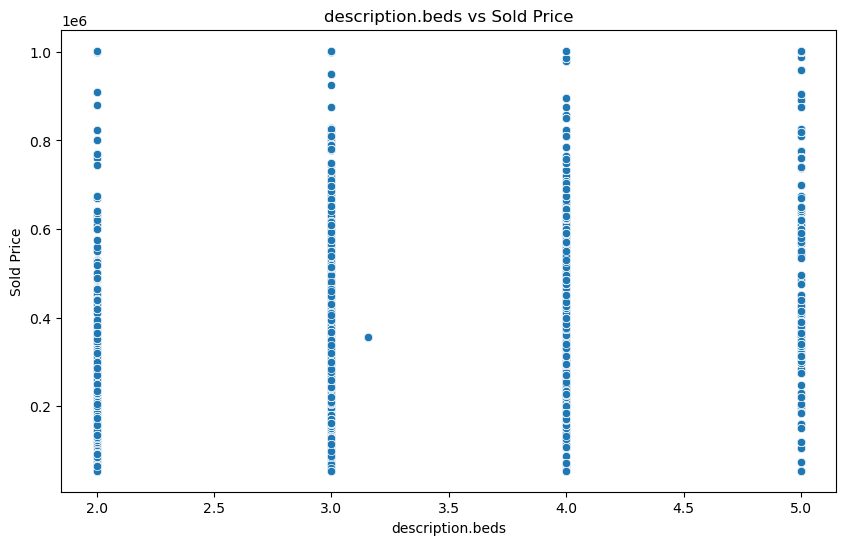

In [72]:
plot_scatterplot(df, 'description.beds')

### Interpretation of the Scatterplot: `description.beds` vs `description.sold_price`

The scatterplot shows the relationship between the number of bedrooms (`description.beds`) and the sold price of properties (`description.sold_price`). The x-axis represents the number of bedrooms, ranging from 2 to 5, and the y-axis represents the sold price of the properties, ranging from $0 to $900,000.

#### Key Observations:

1. **Distinct Clusters for Each Bedroom Count:**
   - The data points form distinct vertical clusters for each number of bedrooms (2, 3, 4, and 5). This indicates that properties are categorized clearly by their bedroom counts.

2. **Price Variability Within Each Bedroom Category:**
   - There is considerable variability in the sold prices within each bedroom category. For example, properties with 3 bedrooms have sold prices ranging from below $100,000 to around $900,000.

3. **General Price Trends:**
   - Although there is overlap, properties with more bedrooms generally appear to have higher sold prices. For instance, the higher-priced properties (above $500,000) tend to have 3 or more bedrooms.
   
4. **Outliers:**
   - Some outliers can be seen, particularly in the 2 and 5 bedroom categories, where a few properties are priced significantly higher than the others within the same category.

### Conclusion:
The scatterplot indicates that while the number of bedrooms is a factor in determining the sold price of a property, there is significant variability within each bedroom category. Properties with more bedrooms generally trend towards higher sold prices, but other factors also play a role in determining the final sold price.

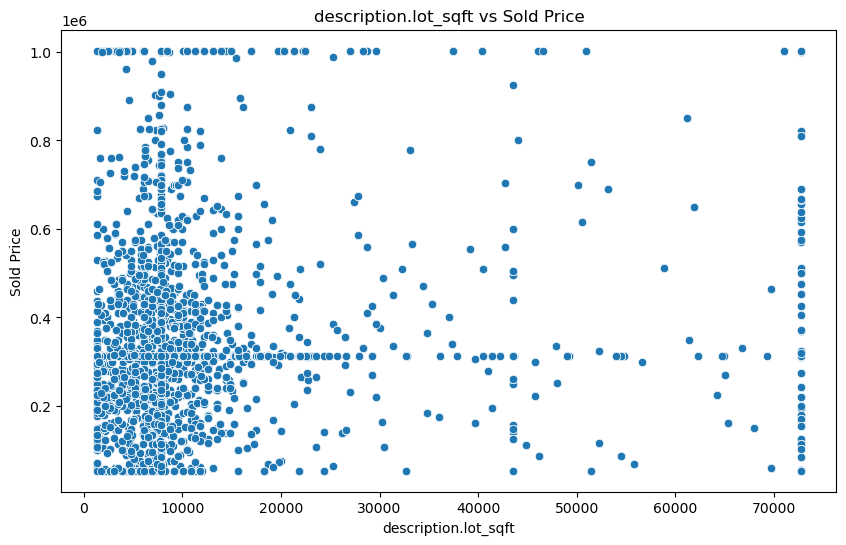

In [73]:
plot_scatterplot(df, 'description.lot_sqft')

### Interpretation of the Scatterplot: `description.lot_sqft` vs `description.sold_price`

The scatterplot shows the relationship between the lot size in square feet (`description.lot_sqft`) and the sold price of properties (`description.sold_price`). The x-axis represents the lot size in square feet, ranging from 0 to 60,000 square feet, and the y-axis represents the sold price of the properties, ranging from $0 to $900,000.

#### Key Observations:

1. **High Variability in Lot Sizes and Prices:**
   - There is significant variability in both lot sizes and sold prices, with data points scattered across a wide range of values.

2. **Concentration of Smaller Lots:**
   - A large concentration of properties with lot sizes below 10,000 square feet is observed. These properties also exhibit a wide range of sold prices, from below $100,000 to around $700,000.

3. **Higher Prices with Larger Lots:**
   - As the lot size increases, there are still properties with lower prices, but some higher-priced properties (up to $900,000) are also observed. However, the relationship between lot size and sold price does not appear to be strictly linear.

4. **Outliers:**
   - Several outliers can be seen, particularly with large lot sizes (over 40,000 square feet), where properties have varying sold prices. These outliers might indicate luxury properties or properties with additional valuable features not captured by lot size alone.

5. **General Trends:**
   - There is a general trend that larger lot sizes can have higher sold prices, but there are many exceptions, indicating that other factors besides lot size significantly influence the sold price.

### Conclusion:
The scatterplot indicates that while larger lot sizes tend to be associated with higher sold prices, there is considerable variability, and other factors likely play a significant role in determining the sold price of a property. There is a high concentration of properties with smaller lot sizes and a wide range of sold prices within this group. This distribution suggests that while lot size is a factor, it is not the sole determinant of property value.

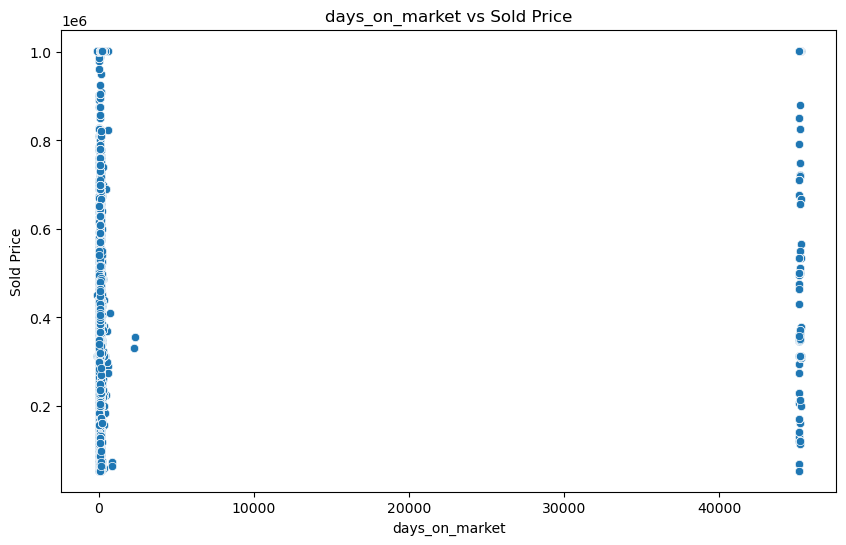

In [74]:
plot_scatterplot(df, 'days_on_market')

### Interpretation of the Scatterplot: `days_on_market` vs `description.sold_price`

The scatterplot shows the relationship between the number of days a property is on the market (`days_on_market`) and the sold price of properties (`description.sold_price`). The x-axis represents the number of days on the market, ranging from 0 to 2,200 days, and the y-axis represents the sold price of the properties, ranging from $0 to $900,000.

#### Key Observations:

1. **Concentration of Properties with Short Market Time:**
   - There is a high concentration of properties that sold within the first 500 days on the market. These properties exhibit a wide range of sold prices, from below $100,000 to around $900,000.

2. **Outliers with Long Market Time:**
   - A few properties have been on the market for an extended period (over 1,000 days). These outliers have a variety of sold prices, indicating that some properties take significantly longer to sell.

3. **No Clear Trend in Price with Market Time:**
   - There doesn't appear to be a clear trend showing that properties with longer market times sell for higher or lower prices. Instead, the sold prices seem to be distributed across all market times.

4. **High Variability in Sold Prices:**
   - The scatterplot shows high variability in sold prices for properties with shorter market times, indicating that many factors other than market time are likely influencing the sold price.

5. **Cluster of High-Value Sales with Extended Market Time:**
   - There is a noticeable cluster of high-value sales (over $700,000) that took more than 2,000 days to sell. These could represent unique or luxury properties that required a longer period to find the right buyer.

### Conclusion:
The scatterplot suggests that while most properties sell within the first 500 days, the number of days a property is on the market does not strongly correlate with its sold price. There are significant outliers with extended market times, and these properties can have a wide range of sold prices, including very high values. This indicates that other factors beyond market time are critical in determining the sold price of a property.

## Correlation Heatmap

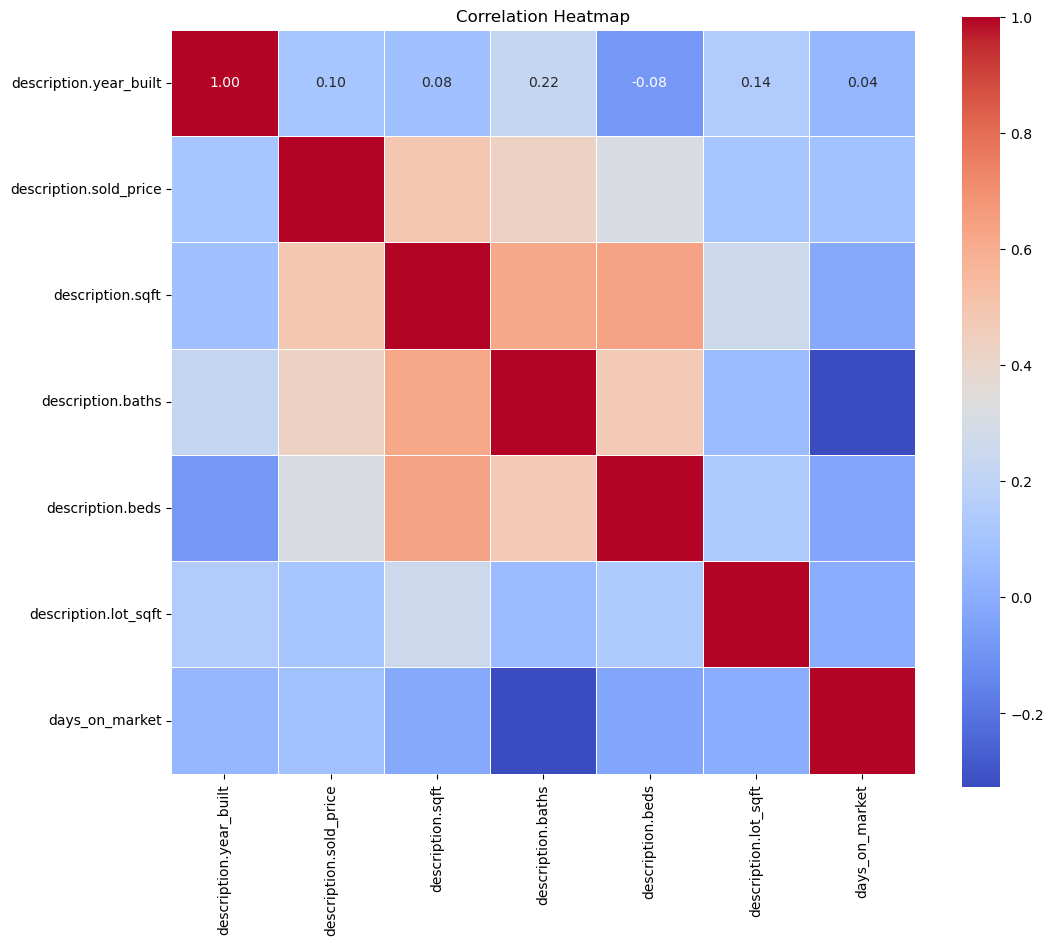

In [90]:
# Correlation Heatmap
def plot_selected_correlation_heatmap(df, features):
    # Compute the correlation matrix
    corr = df[features].corr()
    
    # Set up the matplotlib figure
    plt.figure(figsize=(12, 10))
    
    # Draw the heatmap with the mask and correct aspect ratio
    sns.heatmap(corr, annot=True, fmt='.2f', cmap='coolwarm', square=True, linewidths=.5)
    plt.title('Correlation Heatmap')
    plt.show()

selected_features = ['description.year_built', 'description.sold_price', 'description.sqft', 
                     'description.baths', 'description.beds', 'description.lot_sqft', 
                     'days_on_market']

plot_selected_correlation_heatmap(df, selected_features)

## Boxplots

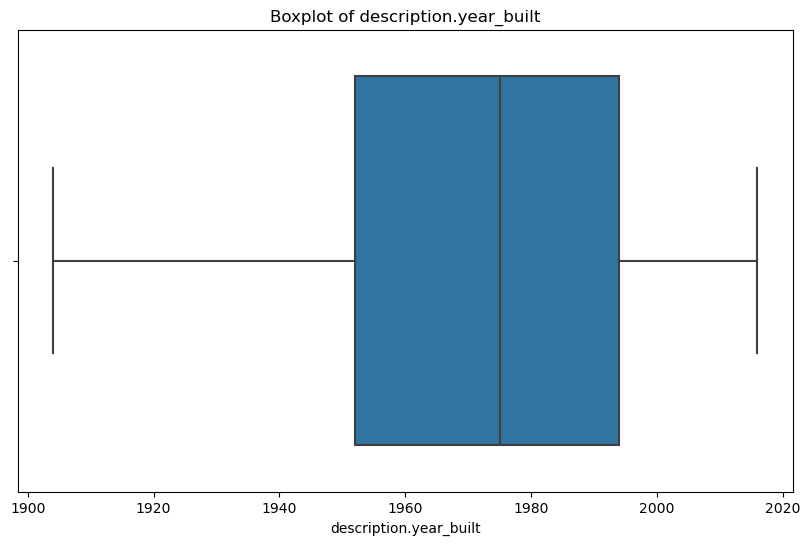

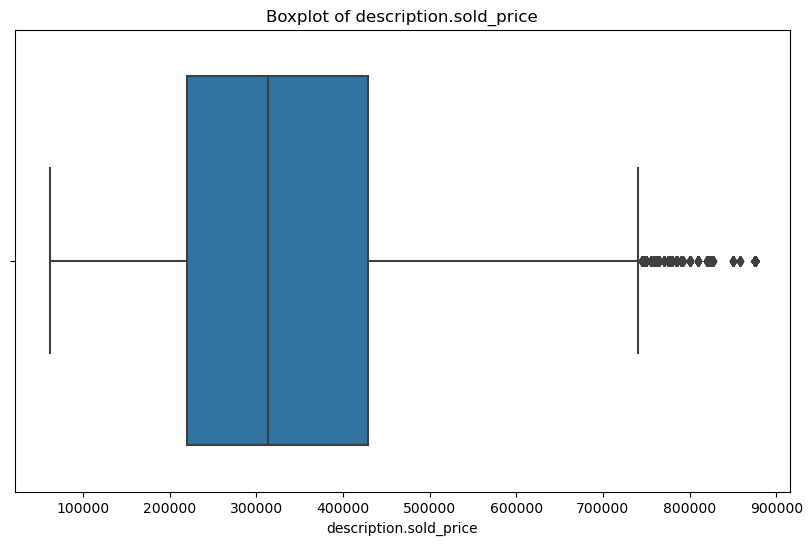

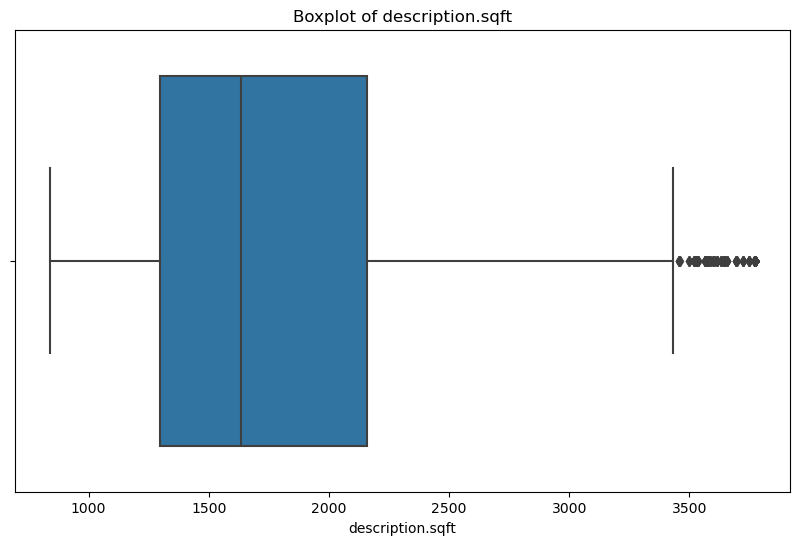

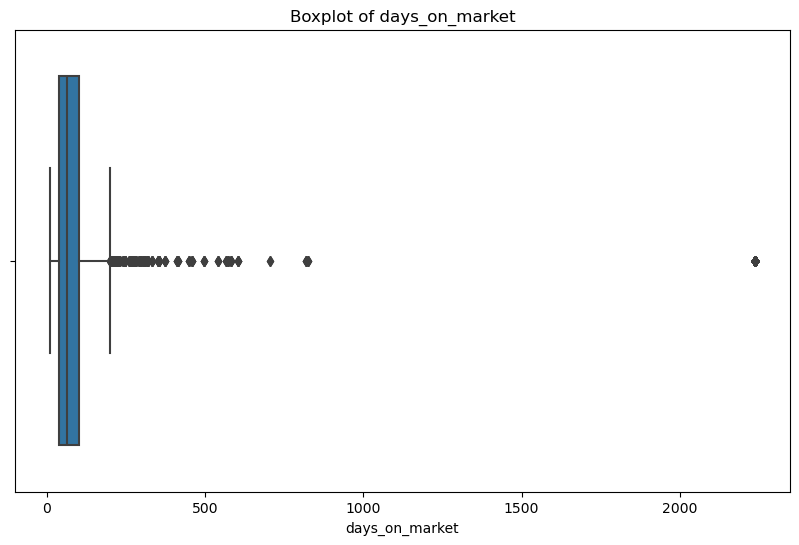

In [93]:
# Function to create boxplots for specified columns
def plot_boxplots(df, columns):
    for col in columns:
        plt.figure(figsize=(10, 6))
        sns.boxplot(x=df[col])
        plt.title(f'Boxplot of {col}')
        plt.show()

# Columns for which to create boxplots
columns_to_plot = [
    'description.year_built',
    'description.sold_price',
    'description.sqft',
    'days_on_market'
]

# Plot boxplots
plot_boxplots(df, columns_to_plot)

Now is a great time to scale the data and save it once it's preprocessed.
- You can save it in your data folder, but you may want to make a new `processed/` subfolder to keep it organized